In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading and pre-processing

In [3]:
sns.set_style("whitegrid")
sns.set_palette("viridis") 

In [4]:
# use your own path
abm_data = pd.read_csv('/Users/alyssapradhan/Downloads/sim_20241125.csv') 

In [5]:
# new columns
abm_data['coop_prop'] = abm_data['count_As'] / (abm_data['count_Ss'] + abm_data['count_As'])
abm_data['multiplier'] = abm_data['multiplier'].astype('category')
abm_data['rec_cheater_prop'] = abm_data['count_Ss_recomb'] / (abm_data['count_As_recomb'] + abm_data['count_Ss_recomb'])

#### Generating figures 2A-2E

Generally for all these visualisations there is not yet enough data for the regression lines / confidence intervals to make sense.


/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_75248/2930312337.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for multiplier, sub_group in group.groupby('multiplier'):


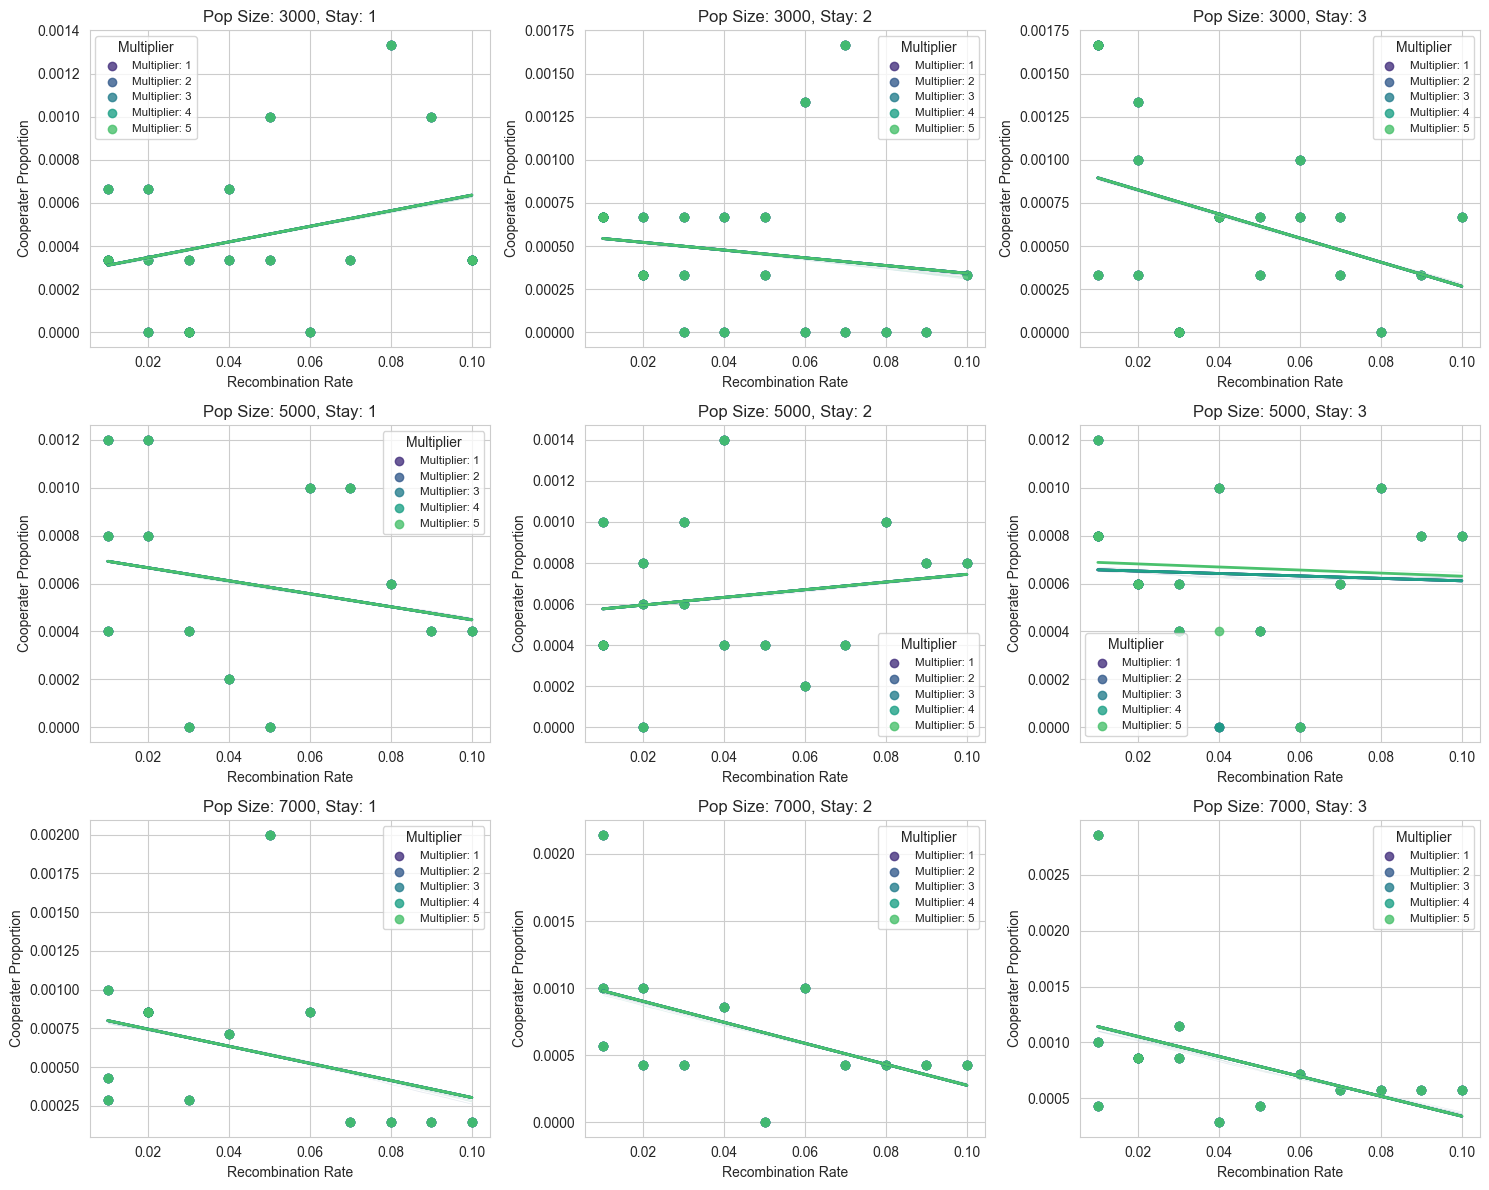

In [6]:
grouped = abm_data.groupby(['pop-size', 'stay'])

# Determine the number of subplots needed
num_plots = len(grouped)
rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((pop_size, stay), group) in enumerate(grouped):
    ax = axes[idx]
    
    # Group further by 'multiplier' and plot a line for each multiplier
    for multiplier, sub_group in group.groupby('multiplier'):
        sns.regplot(
            x='rec_rate', 
            y='coop_prop', 
            data=sub_group, 
            ax=ax, 
            label=f'Multiplier: {multiplier}', 
            scatter=True,  # Show scatter points
            ci=True, 
            line_kws={'linewidth': 2}  # Customize trend line
        )
        
    
    ax.set_title(f'Pop Size: {pop_size}, Stay: {stay}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Multiplier', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

#### Generating Figure 3A-3E

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_75248/46432486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped5k = abm_5k.groupby(['multiplier'])


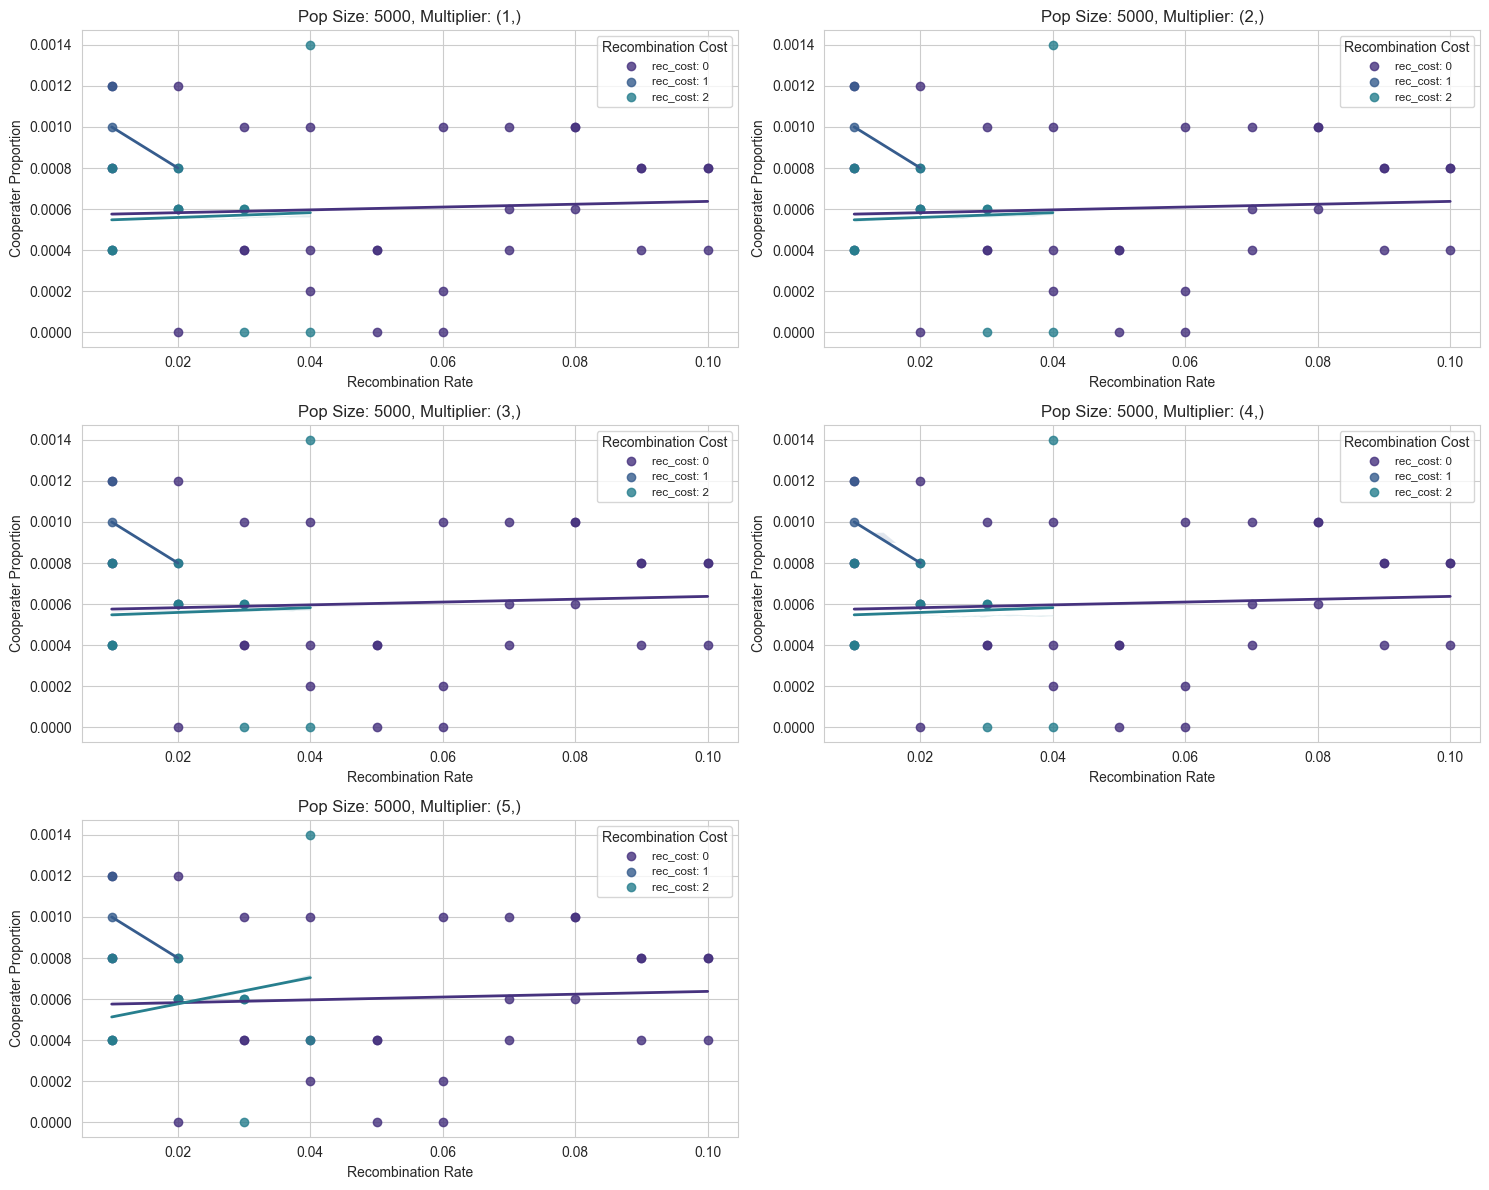

In [7]:
abm_5k = abm_data[abm_data['pop-size'] == 5000]
grouped5k = abm_5k.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(grouped5k)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((multiplier), group) in enumerate(grouped5k):
    ax = axes[idx]
    
    # Group further by 'rec_cost' and plot a line for each rec_cost
    for rec_cost, sub_group in group.groupby('rec_cost'):
        sns.regplot(
            x='rec_rate', 
            y='coop_prop', 
            data=sub_group, 
            ax=ax, 
            label=f'rec_cost: {rec_cost}', 
            scatter=True,  # Show scatter points
            ci=True, 
            line_kws={'linewidth': 2}  # Customize trend line
        )

    ax.set_title(f'Pop Size: 5000, Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

#### Generating figure 4A-4E

I realise they're all the same, it looks like that's the underlying data

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_75248/1351433027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abm_mult = abm_data.groupby(['multiplier'])


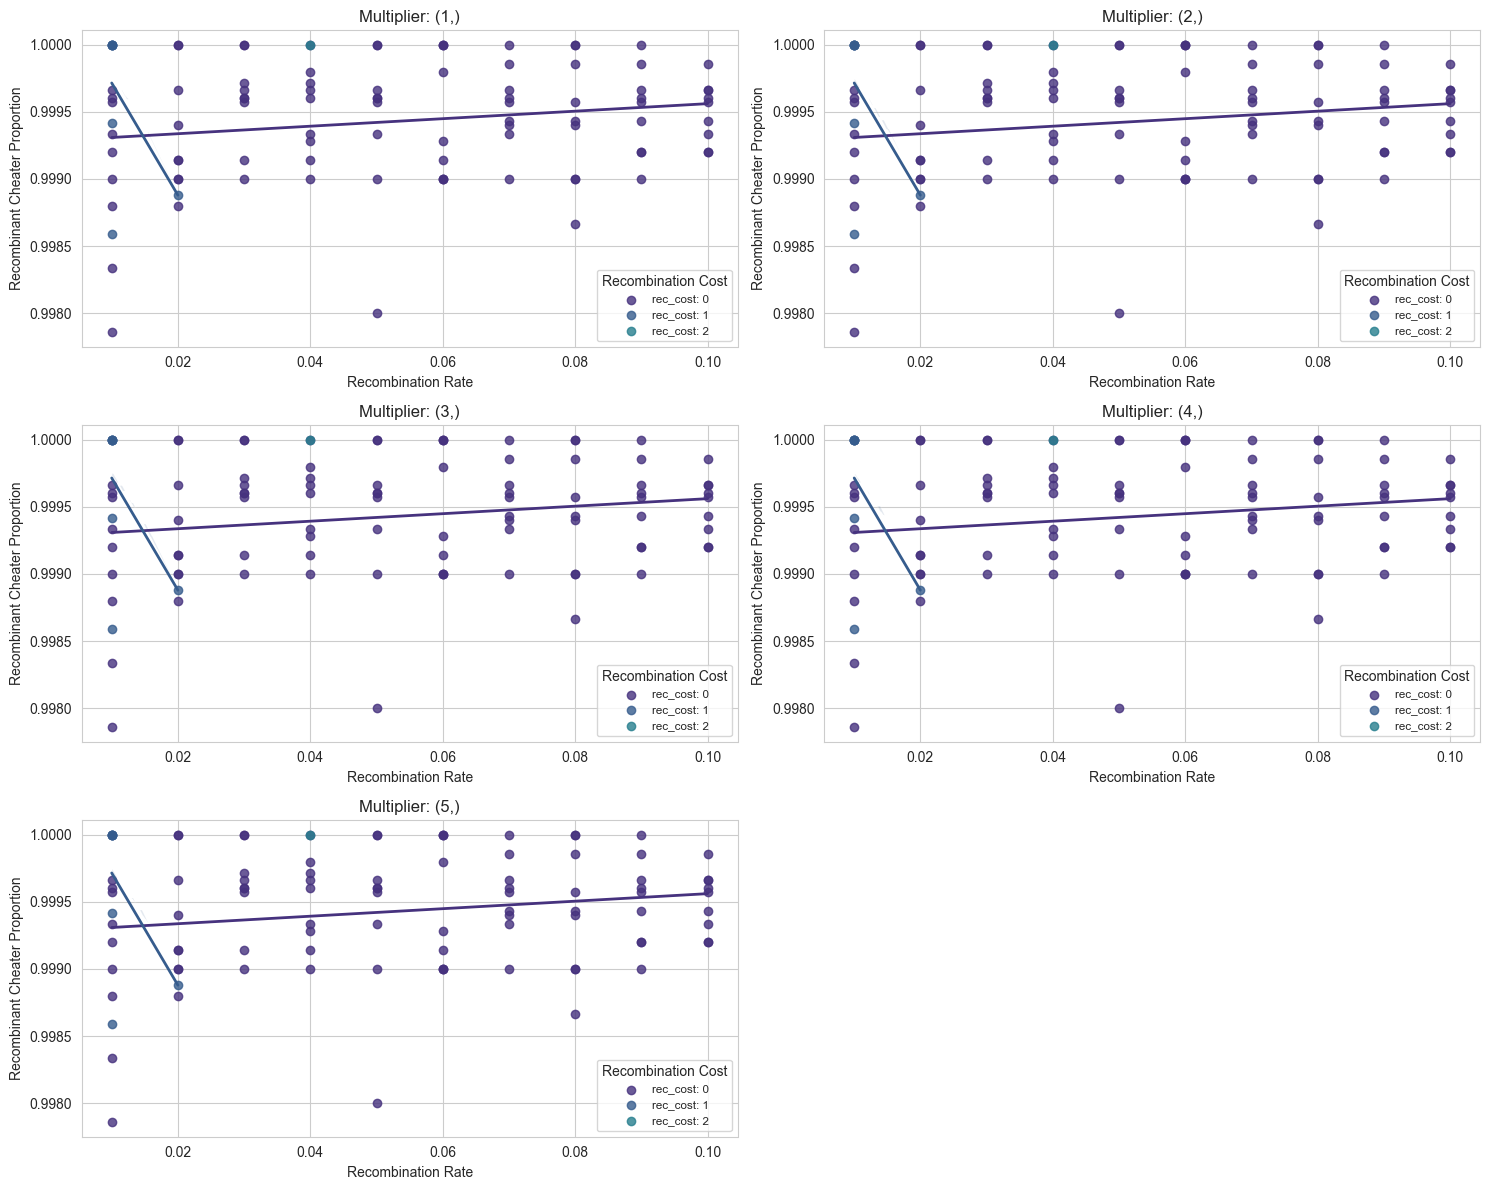

In [8]:
abm_mult = abm_data.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(abm_mult)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, (multiplier, group) in enumerate(abm_mult):
    ax = axes[idx]
    
    # Plot trend lines for each 'rec_cost'
    for rec_cost, sub_group in group.groupby('rec_cost'):
         sns.regplot(
            x='rec_rate', 
            y='rec_cheater_prop', 
            data=sub_group, 
            ax=ax, 
            label=f'rec_cost: {rec_cost}', 
            scatter=True,  # Show scatter points
            ci=True, 
            line_kws={'linewidth': 2}  # Customize trend line
        )
    
    ax.set_title(f'Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Recombinant Cheater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
abm_mult.describe()

pop-size                                                       \
              count    mean          std     min     25%     50%     75%   
multiplier                                                                 
1             270.0  5000.0  1636.025649  3000.0  3000.0  5000.0  7000.0   
2             270.0  5000.0  1636.025649  3000.0  3000.0  5000.0  7000.0   
3             270.0  5000.0  1636.025649  3000.0  3000.0  5000.0  7000.0   
4             270.0  5000.0  1636.025649  3000.0  3000.0  5000.0  7000.0   
5             270.0  5000.0  1636.025649  3000.0  3000.0  5000.0  7000.0   

                   rec_cost       ... coop_prop           rec_cheater_prop  \
               max    count mean  ...       75%       max            count   
multiplier                        ...                                        
1           7000.0    270.0  1.0  ...  0.000857  0.002857             99.0   
2           7000.0    270.0  1.0  ...  0.000857  0.002857             99.0   
3           7000.0    270.0  1.0  ...  0.000857  0.002857             99.0   
4           7000.0    270.0  1.0  ...  0.000857  0.002857             99.0   
5           7000.0    270.0  1.0  ...  0.000857  0.002857             99.0   

                                                                           
                mean       std       min       25%       50%     75%  max  
multiplier                                                                 
1           0.999455  0.000449  0.997857  0.999143  0.999571  0.9998  1.0  
2           0.999455  0.000449  0.997857  0.999143  0.999571  0.9998  1.0  
3           0.999455  0.000449  0.997857  0.999143  0.999571  0.9998  1.0  
4           0.999455  0.000449  0.997857  0.999143  0.999571  0.9998  1.0  
5           0.999455  0.000449  0.997857  0.999143  0.999571  0.9998  1.0  

[5 rows x 80 columns]